In [1]:
# init
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button, RadioButtons

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import datetime

%matplotlib qt

plt.rcParams['animation.ffmpeg_path'] = 'C:/Program Files/ffmpeg/bin/ffmpeg.exe'


visualisation_folder = "Visualisation/test2_res"
hashfile = "Visualisation/test2_res/hash.npy"
vis_regexp = 'vis_(\d\d\d\d).npy'

In [2]:
def visualize_embeddings(embeddings, targets, model_name, dim_reducer):
    """
    From: https://github.com/tiulpin/metric-learning-experiment/blob/master/lc/utils.py
    Plots reduced embeddings space (dimension reduction using Principal Component Analysis)
    :param embeddings: (ndarray) objects interpretations from the metric-learning model
    :param targets: (ndarray) targets from the dataset
    :param model_name: (str) the name of the metric-learning model used for saving a plot image
    :param dim_reducer: dimensionality reduction tool used for 2D visualisation
    """
    classes = ['benign', 'malignant', 'val_benign', 'val_malignant']
    colors = ['#0000FF', '#FF0000', '#0000FF', '#FF0000']
    markers = ['o', 'o', '+', '+']

    if 'PCA' == dim_reducer:
        reducer = PCA(n_components=2)
    elif 'TSNE' == dim_reducer:
        reducer = TSNE(n_components=2)
    else:
        raise NotImplementedError
    # embeddings dimensionality reduction
    embeddings = reducer.fit_transform(embeddings)
    #
    now = datetime.datetime.now().strftime("%I:%M%p-%B-%d-%Y")
    # plotting embeddings
    plt.figure(figsize=(10, 10))
    for i in range(len(classes)):
        indices = np.where(targets == i)[0]
        plt.scatter(embeddings[indices, 0], embeddings[indices, 1], alpha=0.9, color=colors[i], marker=markers[i])
    plt.legend(classes)
    plt.savefig(f'plots/{dim_reducer}-{model_name}-{now}.pdf')
    plt.show()

In [3]:
# read actual file list
vis_regexp = re.compile(vis_regexp)
visualizations = os.listdir(visualisation_folder)
vis_list = filter(lambda s: vis_regexp.match(s) != None, visualizations)
vis_list = map(lambda f: np.loadtxt(os.path.join(visualisation_folder, f)), vis_list)
vis_list = list(vis_list)

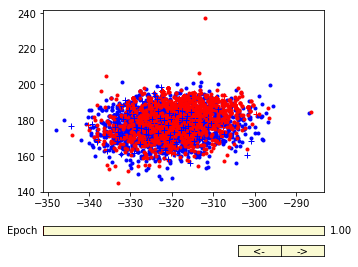

In [4]:
# https://matplotlib.org/users/pyplot_tutorial.html



N = 0
vis = vis_list[N]
id_train_benign = np.where(vis[:,0] == 0)
id_train_malignant = np.where(vis[:,0] == 1)
id_validation_benign = np.where(vis[:,0] == 2)
id_validation_malignant = np.where(vis[:,0] == 3)


fig, ax = plt.subplots()
ax.clear()
fig.clear()
sp1 = fig.add_subplot(1, 1, 1)
plt.subplots_adjust(left=0.25, bottom=0.25)


# https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html
sp1.plot(vis[id_train_benign,1], vis[id_train_benign,2], 'b.')
sp1.plot(vis[id_train_malignant,1], vis[id_train_malignant,2], 'r.')
sp1.plot(vis[id_validation_benign,1], vis[id_validation_benign,2], 'b+')
sp1.plot(vis[id_validation_malignant,1], vis[id_validation_malignant,2], 'r+')


axcolor = 'lightgoldenrodyellow'
axepoch = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
prevax = plt.axes([0.7, 0.025, 0.1, 0.04])
nextax = plt.axes([0.8, 0.025, 0.1, 0.04])

sepoch = Slider(axepoch, 'Epoch', 1, len(vis_list), valinit=N, valstep=1)
bprev = Button(prevax, '<-', color=axcolor, hovercolor='0.975')
bnext = Button(nextax, '->', color=axcolor, hovercolor='0.975')


def update(val):
    N = int(sepoch.val) - 1
    vis = vis_list[N]
    id_train_benign = np.where(vis[:,0] == 0)
    id_train_malignant = np.where(vis[:,0] == 1)
    id_validation_benign = np.where(vis[:,0] == 2)
    id_validation_malignant = np.where(vis[:,0] == 3)
    
    sp1.clear()
    
    sp1.plot(vis[id_train_benign,1], vis[id_train_benign,2], 'b.')
    sp1.plot(vis[id_train_malignant,1], vis[id_train_malignant,2], 'r.')
    sp1.plot(vis[id_validation_benign,1], vis[id_validation_benign,2], 'b+')
    sp1.plot(vis[id_validation_malignant,1], vis[id_validation_malignant,2], 'r+')
    

def _prev(val):
    N = int(sepoch.val)
    if (N > 1):
        N -= 1
    sepoch.set_val(N)
    update(val)
    
def _next(val):
    N = int(sepoch.val)
    if (N < len(vis_list)):
        N += 1
    sepoch.set_val(N)
    update(val)
bprev.on_clicked(_prev)
bnext.on_clicked(_next)
    

    
sepoch.on_changed(update)

#plt.show()

pass

In [5]:
# make animation
# https://matplotlib.org/2.1.2/gallery/animation/basic_example.html
# https://mikulskibartosz.name/interactive-plots-in-jupyter-notebook-55b32b8d143
# https://stackoverflow.com/questions/25111040/how-to-change-color-of-plotted-curves-when-using-animations-in-python-matplotlib

%matplotlib qt

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)   


#l, = plt.plot([], [], 'r-')
#plt.xlim(0, 1)
#plt.ylim(0, 1)
#plt.xlabel('x')
#plt.title('test')


def update(num):
    ax1.clear()
    
    vis = vis_list[num]
    id_train_benign = np.where(vis[:,0] == 0)
    id_train_malignant = np.where(vis[:,0] == 1)
    
    
    plt.title('Epoch #{}'.format(num + 1))
    plt.xlabel('x')
    plt.ylabel('y')

    ax1.plot(vis[id_train_benign,1], vis[id_train_benign,2], 'b.')
    ax1.plot(vis[id_train_malignant,1], vis[id_train_malignant,2], 'r.')
    ax1.plot(vis[id_validation_benign,1], vis[id_validation_benign,2], 'b+')
    ax1.plot(vis[id_validation_malignant,1], vis[id_validation_malignant,2], 'r+')

line_ani = animation.FuncAnimation(fig1, update, len(vis_list), interval=400, blit=False)

#plt.show()
# To save the animation, use the command: line_ani.save('lines.mp4')

In [ ]:
# https://matplotlib.org/2.1.2/gallery/animation/basic_example_writer_sgskip.html
# https://stackoverflow.com/questions/23856990/cant-save-matplotlib-animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=3, metadata=dict(artist='Kry127'), bitrate=1800)

line_ani.save('dataset.mp4', writer=writer)

In [55]:
N = len(vis_list) - 1
#N=0

vis = vis_list[N]
embeddings = vis[:,1:]
targets = vis[:,0]
model_name="N={}".format(N)
visualize_embeddings(embeddings, targets, model_name, "TSNE")

In [56]:
# knn
k=7
sigma=10000
threshold=10000000000

print("k={}, sigma={}, threshold={}".format(k, sigma, threshold))

N = len(vis_list) - 1

weighted = True
for_hash = True
print_every_result = True
print_every_result = print_every_result and not for_hash

vis = vis_list[N]
id_train_benign = np.where(vis[:,0] == 0)
id_train_malignant = np.where(vis[:,0] == 1)
id_validation_benign = np.where(vis[:,0] == 2)
id_validation_malignant = np.where(vis[:,0] == 3)

train_benign = vis[id_train_benign,1:][0]
train_malignant = vis[id_train_malignant,1:][0]
validation_benign = vis[id_validation_benign,1:][0]
validation_malignant = vis[id_validation_malignant,1:][0]

# for hash
if for_hash:
    hashes = np.load(hashfile)
    id_validation_benign = np.where(hashes[:,0] == 0)
    id_validation_malignant = np.where(hashes[:,0] == 1)
    validation_benign = hashes[id_validation_benign,1:][0]
    validation_malignant = hashes[id_validation_malignant,1:][0]


weighter = np.vectorize(lambda x: np.sign(x)/sigma*np.e ** -(((x/sigma)**2)/2) )
#weighter = np.vectorize(lambda x: x )

benign_len = validation_benign.shape[0]
benign_correct = 0
for i in range(0, benign_len):
    nodule_hash = validation_benign[i]
    dist_benign = np.sum(np.square(train_benign - nodule_hash), axis=1)
    dist_malignant = np.sum(np.square(train_malignant - nodule_hash), axis=1)
    
    # учитывая расстояние threshold, отсекаем и сортируем данные
    dist_benign = dist_benign[np.where(dist_benign < threshold)]
    dist_malignant = dist_malignant[np.where(dist_malignant < threshold)]
    
    dists = np.append(-dist_benign, dist_malignant)
    if (len(dists) > 0):
        dists = weighter(dists)
    else:
        dists = np.array([0])
    
    dists_abs = np.vectorize(lambda val: np.abs(val))(dists)
    dists_abs_id_sorted = np.argsort(dists_abs)
    dists_sorted = dists[dists_abs_id_sorted]

    # TODO choose k biggest by module weights
    # TODO sum chosen weights and pass to heavyside function
    if weighted:
        result = np.sum(dists_sorted[-k:])
    else:
        result = np.sum(dists_sorted[-k:] > 0) - np.sum(dists_sorted[-k:] < 0)
    #result = np.sum(dists_sorted[:k])
    text_result = "unknown"
    if (result < 0):
        text_result = "benign"
        benign_correct += 1
    elif (result > 0):
        text_result = "malignant"
        
    if print_every_result:
        print("Benign #{} distance: {}, classified as: {}".format(i, result, text_result))
    
print("Benign accuracy: {}".format(benign_correct/benign_len))
    
malignant_len = validation_malignant.shape[0]
malignant_correct = 0
for i in range(0, malignant_len):
    nodule_hash = validation_malignant[i]
    dist_benign = np.sum(np.square(train_benign - nodule_hash), axis=1)
    dist_malignant = np.sum(np.square(train_malignant - nodule_hash), axis=1)
    
    # учитывая расстояние threshold, отсекаем и сортируем данные
    dist_benign = dist_benign[np.where(dist_benign < threshold)]
    dist_malignant = dist_malignant[np.where(dist_malignant < threshold)]
    
    dists = np.append(-dist_benign, dist_malignant)
    if (len(dists) > 0):
        dists = weighter(dists)
    else:
        dists = np.array([0])
    
    dists_abs = np.vectorize(lambda val: np.abs(val))(dists)
    dists_abs_id_sorted = np.argsort(dists_abs)
    dists_sorted = dists[dists_abs_id_sorted]

    # TODO choose k biggest by module weights
    # TODO sum chosen weights and pass to heavyside function
    if weighted:
        result = np.sum(dists_sorted[-k:])
    else:
        result = np.sum(dists_sorted[-k:] > 0) - np.sum(dists_sorted[-k:] < 0)
    #result = np.sum(dists_sorted[:k])
    text_result = "unknown"
    if (result < 0):
        text_result = "benign"
    elif (result > 0):
        malignant_correct += 1
        text_result = "malignant"
        
    if print_every_result:
        print("Malignant #{} distance: {}, classified as: {}".format(i, result, text_result))
    
print("Malignant accuracy: {}".format(malignant_correct/malignant_len))

print("Overall accuracy: {}".format((benign_correct+malignant_correct)/(benign_len+malignant_len)))
    

    

k=7, sigma=10000, threshold=10000000000
Benign accuracy: 0.7075517464424321
Malignant accuracy: 0.6784623217922607
Overall accuracy: 0.7005400098183603
